In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy import cos 
from numpy import sin
sns.set()

In [17]:
import matplotlib
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['axes.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['legend.loc'] = 'best'
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['legend.edgecolor'] = 'k'

In [18]:
def mae(y0, y1):
    mae = np.mean(abs(np.array(y0)-np.array(y1)))
    print("Mean Absolute Error: {}".format(mae))

In [30]:
#algorithm = "random"
#case = ""
algorithm = "genetic_algorithm"
case = "Tournament5_Elite5_PointMUT07_4/"
#algorithm = "parallel_genetic_algorithm"
#case = "PARALLEL10_NPOP300_NGEN500_2/"
#algorithm = "hillclimb"
#case = ""
if algorithm=="random":
    x_factor = 1
elif algorithm=="hillclimb":
    x_factor = 1
elif algorithm=="genetic_algorithm":
    x_factor = 500
elif algorithm=="parallel_genetic_algorithm":
    x_factor = 300 * 10

# Read files

In [31]:
df = pd.read_csv("./genetic_algorithm/sample/function1.csv", header=None)
df_func = []
df_hist = []
df_dist = []
df_solution = []
i = 0
while True:
    try:
        num = "n" + str(i) + "/"
        folder = "./" + algorithm + "/results/" + case + num
        df_func.append(pd.read_csv(folder+"bestpath.csv", header=None))
        df_hist.append(pd.read_csv(folder+"history.csv", header=None))
        df_dist.append(pd.read_csv(folder+"distribution.csv", header=None))
        df_solution.append(pd.read_csv(folder+"/solution.csv", header=None))
        print("n{}: Success.".format(i))
        i += 1;
    except:
        print("{}: No file exists.".format(folder))
        N = i
        break

n0: Success.
n1: Success.
n2: Success.
n3: Success.
n4: Success.
n5: Success.
n6: Success.
n7: Success.
n8: Success.
n9: Success.
./genetic_algorithm/results/Tournament5_Elite5_PointMUT07_4/n10/: No file exists.


# Best solution and fitness

In [32]:
solution = np.array([df_solution[i].iloc[-1] for i in range(N)])
best_index = np.argmin(np.array(solution[:, 1], dtype=np.float32))
best_solution = solution[best_index][0]
best_fitness = solution[best_index][1]
print("Best Solution: {}\nBest Fitness:  {}".format(best_solution, best_fitness))

Best Solution: (sin(((2.000000*x)-(x/2.000000)))/((x/2.000000)+1.000000))
Best Fitness:  2.54379e-05


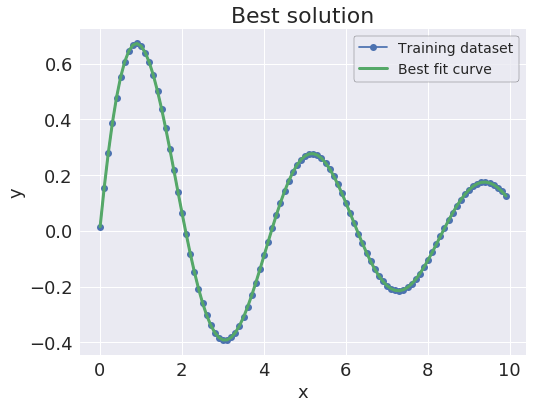

In [33]:
x = df[0][1::10]
y = df[1][1::10]
x_est = df_func[best_index][0]
y_est = df_func[best_index][1]

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
ax.plot(x, y, marker='o', linestyle=None, label="Training dataset")
ax.plot(x_est, y_est, linewidth=3, label="Best fit curve")

ax.set_title("Best solution")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.legend(loc="best")
plt.show()

# Validation

Mean Absolute Error: 2.5401600000002406e-05


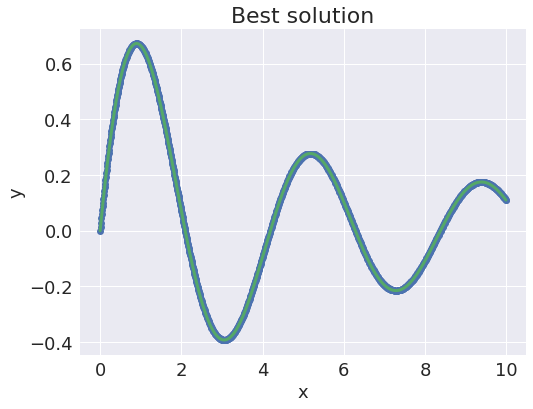

In [34]:
x_all = df[0]
y_all = df[1]
y_anl = sin(1.5*x_all)/(1.0+0.5*x_all)

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
ax.plot(x_all, y_all, marker='o', linestyle=None)
ax.plot(x_all, y_anl, linewidth=3)
ax.set_title("Best solution")
ax.set_xlabel("x")
ax.set_ylabel("y")
mae(y, y_est)
plt.show()

# Learning curve

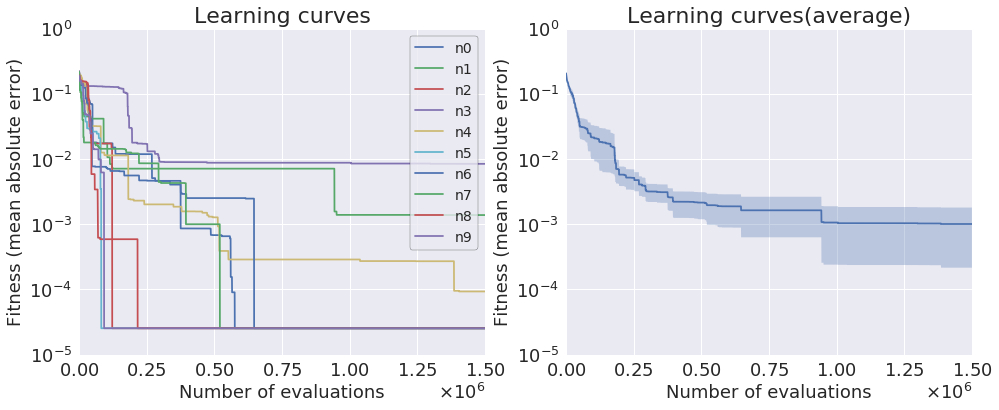

In [35]:
fig = plt.figure(figsize=[16, 6])
ax1 = fig.add_subplot(121)
y_hist_array = []

for i in range(N):
    
    if algorithm=="random":
        hist_array = np.array(df_hist[i][::1000], dtype=np.float32)
    elif algorithm=="hillclimb":
        hist_array = convert(df_hist[i])
    else:
        hist_array = np.array(df_hist[i], dtype=np.float32)

    x_hist = hist_array[:, 0] * x_factor
    y_hist = hist_array[:, 1]
    ax1.plot(x_hist, y_hist, label='n'+str(i))
    y_hist_array.append(y_hist)

ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
plt.xlim([0, 1.5e6])
plt.ylim([1e-5, 1])
plt.semilogy()
plt.title("Learning curves")
plt.xlabel("Number of evaluations")
plt.ylabel("Fitness (mean absolute error)")

y_hist_array = np.array(y_hist_array)
y_ave = np.mean(y_hist_array, axis=0)
y_stderr = np.std(y_hist_array, axis=0)/np.sqrt(N)

ax2 = fig.add_subplot(122)
ax2.plot(x_hist, y_ave)
ax2.fill_between(x_hist, y_ave + y_stderr, y_ave - y_stderr, alpha=0.3)
ax2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
plt.xlim([0, 1.5e6])
plt.ylim([1e-5, 1])
plt.semilogy()
plt.title("Learning curves(average)")
plt.xlabel("Number of evaluations")
plt.ylabel("Fitness (mean absolute error)")
plt.show()

data = np.vstack((x_hist, y_ave, y_stderr))
df = pd.DataFrame(data.T, columns=["x", "ave", "stderr"])
df.to_csv("./learning_curve_" + algorithm + ".csv")

# Diversity plot

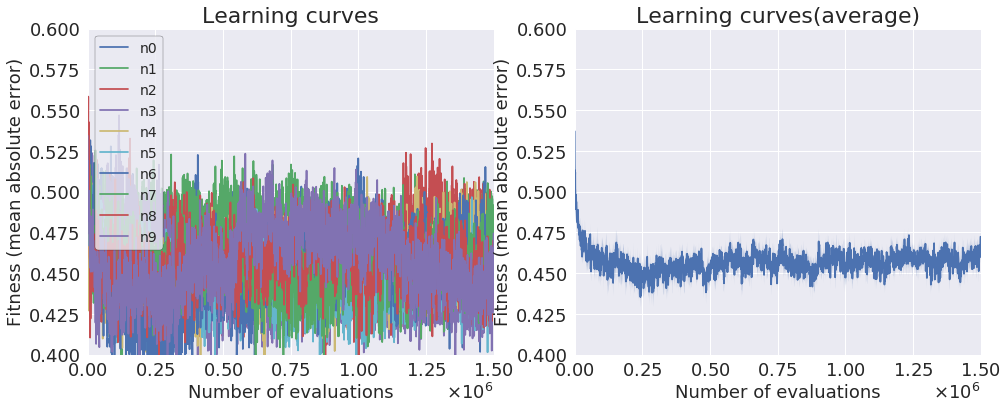

In [36]:
fig = plt.figure(figsize=[16, 6])
ax1 = fig.add_subplot(121)
y_hist_array = []

for i in range(N):
    
    if algorithm=="random":
        hist_array = np.array(df_hist[i][::1000], dtype=np.float32)
    elif algorithm=="hillclimb":
        hist_array = convert(df_hist[i])
    else:
        hist_array = np.array(df_hist[i], dtype=np.float32)

    x_hist = hist_array[:, 0] * x_factor
    y_hist = hist_array[:, 2]
    ax1.plot(x_hist, y_hist, label='n'+str(i))
    y_hist_array.append(y_hist)

ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
plt.xlim([0, 1.5e6])
plt.ylim([0.4, 0.6])
plt.title("Learning curves")
plt.xlabel("Number of evaluations")
plt.ylabel("Fitness (mean absolute error)")

y_hist_array = np.array(y_hist_array)
y_ave = np.mean(y_hist_array, axis=0)
y_stderr = np.std(y_hist_array, axis=0)/np.sqrt(N)

ax2 = fig.add_subplot(122)
ax2.plot(x_hist, y_ave)
ax2.fill_between(x_hist, y_ave + y_stderr, y_ave - y_stderr, alpha=0.3)
ax2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
plt.xlim([0, 1.5e6])
plt.ylim([0.4, 0.6])
plt.title("Learning curves(average)")
plt.xlabel("Number of evaluations")
plt.ylabel("Fitness (mean absolute error)")
plt.show()

data = np.vstack((x_hist, y_ave, y_stderr))
df = pd.DataFrame(data.T, columns=["x", "ave", "stderr"])
df.to_csv("./diversity_plot_" + algorithm + ".csv")

# Convergence plot

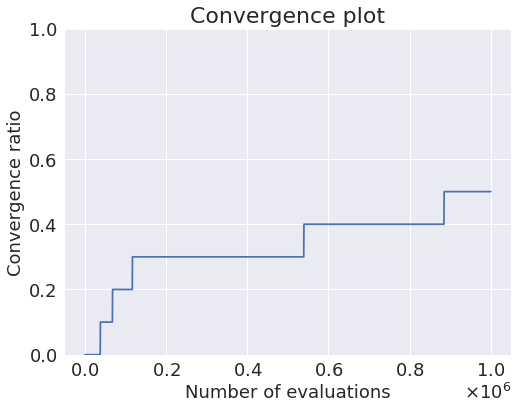

In [26]:
thresh = 1e-4

y_conv_array = []
for i in range(N):
    y_conv = df_solution[i][1]
    y_conv_array.append(y_conv)
y_conv_array = np.array(y_conv_array).T   

ratio = []
for y_conv in y_conv_array:
    ratio.append(sum(y_conv < thresh)/N)

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
ax.plot(x_hist, ratio)
ax.set_ylim([0, 1])
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
plt.title("Convergence plot")
plt.xlabel("Number of evaluations")
plt.ylabel("Convergence ratio")
plt.show()

data = np.vstack((x_hist, ratio))
df = pd.DataFrame(data.T, columns=["x", "ratio"])
df.to_csv("./convergence_plot_" + algorithm + ".csv")

# Dot plot

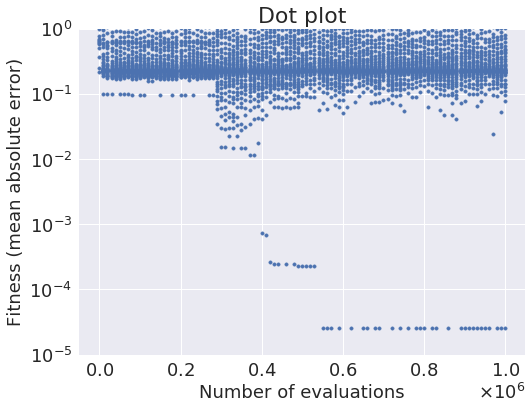

In [27]:
df_dist1 = df_dist[best_index].replace(' inf', np.nan)
df_dist1 = df_dist1.dropna(how='any')
x_dist = df_dist1[0][::10] * x_factor
y_dist = df_dist1[1][::10]
x_dist = np.array(x_dist, dtype=np.float32)
y_dist = np.array(y_dist, dtype=np.float32)

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
ax.scatter(x_dist, y_dist, marker='.')
ax.set_ylim([1e-5, 1.0])
ax.semilogy()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.set_title("Dot plot")
ax.set_xlabel("Number of evaluations")
ax.set_ylabel("Fitness (mean absolute error)")
plt.show()

data = np.vstack((x_dist, y_dist))
df = pd.DataFrame(data.T, columns=["x", "dist"])
df.to_csv("./dot_plot_" + algorithm + ".csv")

In [28]:
def convert(df):
    df_hist1 = np.array(df[::1], dtype=np.float32)
    x = np.linspace(1500, 1500000, 1000)
    vec = []
    for v in df_hist1:
        if v[0] > x[0]:
            vec.append(v)
            x = np.delete(x, 0)
    vec = np.array(vec)
    return(vec)


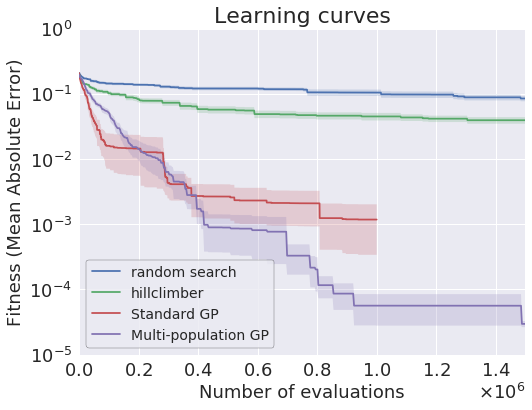

In [29]:
df_list = []
df_list.append(pd.read_csv("./learning_curve_random.csv"))
df_list.append(pd.read_csv("./learning_curve_hillclimb.csv"))
df_list.append(pd.read_csv("./learning_curve_genetic_algorithm.csv"))
df_list.append(pd.read_csv("./learning_curve_parallel_genetic_algorithm.csv"))
labels = ["random search", "hillclimber", "Standard GP", "Multi-population GP"]

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
ax.set_title("Learning curves")
ax.set_xlabel("Number of evaluations")
ax.set_ylabel("Fitness (Mean Absolute Error)")
ax.set_xlim([0, 1.5e6])
ax.set_ylim([1e-5, 1])
ax.set_yscale("log") 
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))

for df, label in zip(df_list, labels):
    ax.plot(df["x"], df["ave"], label=label)
    ax.fill_between(df["x"], df["ave"]+df["stderr"] , df["ave"]-df["stderr"], alpha=0.2)
plt.legend(loc="best")
plt.show()

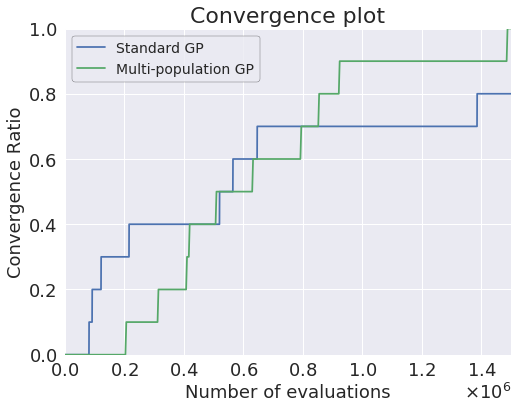

In [463]:
df_list = []
df_list.append(pd.read_csv("./convergence_plot_genetic_algorithm.csv"))
df_list.append(pd.read_csv("./convergence_plot_parallel_genetic_algorithm.csv"))
labels = ["Standard GP", "Multi-population GP"]
fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
plt.title("Convergence plot")
plt.xlabel("Number of evaluations")
plt.ylabel("Convergence Ratio")
ax.set_xlim([0, 1.5e6])
ax.set_ylim([0, 1])
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))

for df, label in zip(df_list, labels):
    ax.plot(df["x"], df["ratio"], label=label)
plt.legend(loc="best")
plt.show()

# Diversity plot

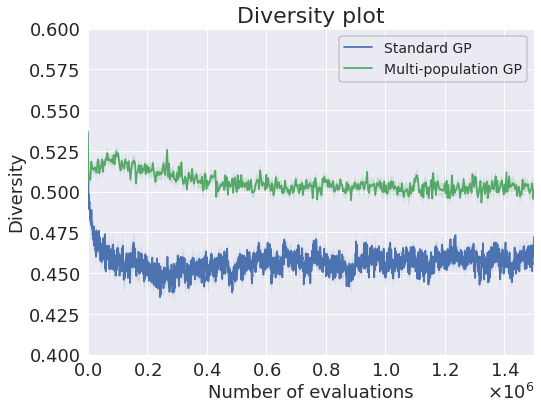

In [464]:
df_list = []
df_list.append(pd.read_csv("./diversity_plot_genetic_algorithm.csv"))
df_list.append(pd.read_csv("./diversity_plot_parallel_genetic_algorithm.csv"))
labels = ["Standard GP", "Multi-population GP"]

fig = plt.figure(figsize=[8, 6])
ax = fig.add_subplot(111)
ax.set_title("Diversity plot")
ax.set_xlabel("Number of evaluations")
ax.set_ylabel("Diversity")
ax.set_xlim([0, 1.5e6])
ax.set_ylim([0.4, 0.6])
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))

for df, label in zip(df_list, labels):
    ax.plot(df["x"], df["ave"], label=label)
    ax.fill_between(df["x"], df["ave"]+df["stderr"] , df["ave"]-df["stderr"], alpha=0.2)
plt.legend(loc="best")
plt.show()

# Dot plot

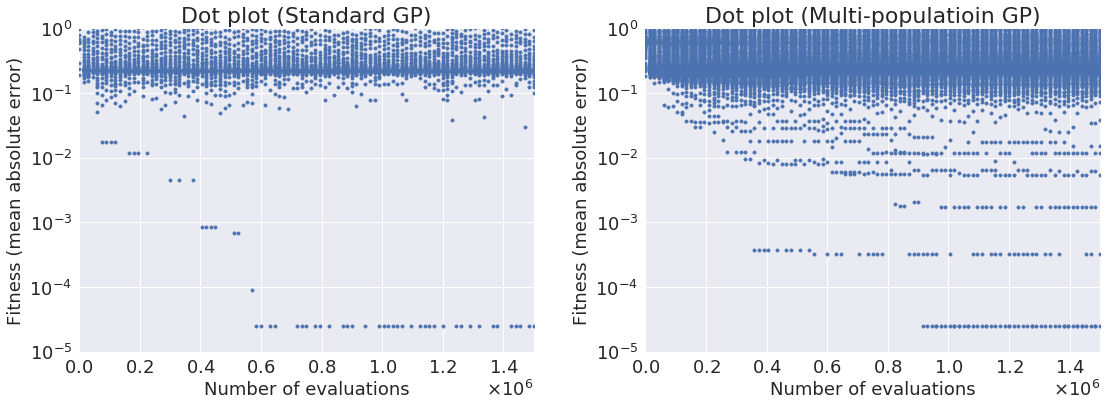

In [467]:
df_list = []
df_list.append(pd.read_csv("./dot_plot_genetic_algorithm.csv"))
df_list.append(pd.read_csv("./dot_plot_parallel_genetic_algorithm.csv"))
labels = ["Standard GP", "Multi-population GP"]

fig = plt.figure(figsize=[16, 6])

df = df_list[0]
ax1 = fig.add_subplot(121)
ax1.set_xlim([0, 1.5e6])
ax1.set_ylim([1e-5, 1.0])
ax1.semilogy()
ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax1.set_title("Dot plot (Standard GP)")
ax1.set_xlabel("Number of evaluations")
ax1.set_ylabel("Fitness (mean absolute error)")
ax1.scatter(df["x"], df["dist"], marker=".")

df = df_list[1]
ax2 = fig.add_subplot(122)
ax2.set_xlim([0, 1.5e6])
ax2.set_ylim([1e-5, 1.0])
ax2.semilogy()
ax2.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax2.set_title("Dot plot (Multi-populatioin GP)")
ax2.set_xlabel("Number of evaluations")
ax2.set_ylabel("Fitness (mean absolute error)")
ax2.scatter(df["x"], df["dist"], marker=".")

plt.tight_layout()
plt.show()

In [426]:
x_factor

3000